# Sprint 4 - Cloud Deployment

### Team ID - PNT2022TMID27279

In [7]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.layers import Dense,Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [8]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The label value is  6


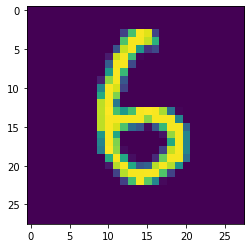

In [9]:
print("The label value is ",y_test[21])
plt.imshow(X_test[21])

The label value is  1


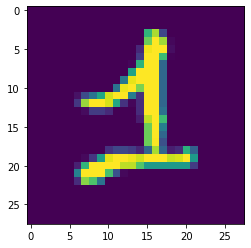

In [10]:
print("The label value is ",y_train[24])
plt.imshow(X_train[24])

In [11]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')
number_of_classes= 10
y_train = np_utils.to_categorical(y_train,number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)
print("After encoding the value 6 of y_test[21] become", y_test[21])

After encoding the value 6 of y_test[21] become [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
model= tf.keras.Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer="Adam", metrics=['accuracy'])

In [13]:
early_stopping = EarlyStopping(monitor='accuracy', patience=3)
reduce_lr = ReduceLROnPlateau(monitor='accuracy', patience=3, factor=0.5,min_lr=0.00001)
callback = [reduce_lr,early_stopping]

In [14]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=15,batch_size=32,callbacks=callback)

Epoch 1/15
1875/1875 [==============================] - 191s 101ms/step - loss: 0.2259 - accuracy: 0.9510 - val_loss: 0.0903 - val_accuracy: 0.9730 - lr: 0.0010
Epoch 2/15
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0692 - accuracy: 0.9791 - val_loss: 0.0725 - val_accuracy: 0.9775 - lr: 0.0010
Epoch 3/15
1875/1875 [==============================] - 188s 100ms/step - loss: 0.0518 - accuracy: 0.9836 - val_loss: 0.0789 - val_accuracy: 0.9786 - lr: 0.0010
Epoch 4/15
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0404 - accuracy: 0.9874 - val_loss: 0.0799 - val_accuracy: 0.9775 - lr: 0.0010
Epoch 5/15
1875/1875 [==============================] - 187s 100ms/step - loss: 0.0292 - accuracy: 0.9914 - val_loss: 0.1039 - val_accuracy: 0.9772 - lr: 0.0010
Epoch 6/15
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0290 - accuracy: 0.9913 - val_loss: 0.1035 - val_accuracy: 0.9775 - lr: 0.0010
Epoch 7/15
1875/1875 [=============

In [15]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("loss & accuracy")
print(metrics)

loss & accuracy
[0.42082923650741577, 0.972100019454956]


In [16]:
prediction=model.predict(X_test[:4])
print(np.argmax(prediction,axis=1))
print(y_test[:4])

1/1 [==============================] - 0s 87ms/step
[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [17]:
model.save('digit-recognition.h5')

In [18]:
!tar -zcvf digit-recognition.tar digit-recognition.h5

digit-recognition.h5


In [1]:
!pip install ibm_watson_machine_learning
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"mXnZA6alXjP7nBHb2MhUPvhXgLMo3f9rrj094TbXWv44"
}
client = APIClient(credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [3]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/cec083d33451444c9bdfbd8a8e68291d:db32e8a0-571b-456d-bfb7-b83d8e756301::',
      'guid': 'db32e8a0-571b-456d-bfb7-b83d8e756301',
      'name': 'Watson Machine Learning-uu',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Digit Recognition Deploy',
    'scope': {'bss_account_id': 'cec083d33451444c9bdfbd8a8e68291d'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '309ed175-951a-4207-ad64-06cb7532d89e',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': 'b8d969e17ac94bba9e5796898ad55bdd',
        'api_key': 'YOIs8ACBZPHx_YJnMIkItYHteMz6leUrSBQcVZcllU-F',
        'secret_access_key': 'f116083c6d4898ece2247ffc97e4af607451ca8d20755b7c',
        'service_id': 'ServiceId-ba6e3abe-76ec-4bd9-ad8f-50319827eb10'},
       'editor': {'access_key_id': '494a8d8e4e6243ec95c34d93e9707aac',
    

In [4]:
def guid_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [6]:
space_uid = guid_space_name(client,'Digit Recognition Deploy')
space_uid

'0505f5e8-00b9-481c-aefc-438df31a63c9'

In [7]:
client.set.default_space(space_uid)

'SUCCESS'

In [8]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [9]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [10]:
model_details = client.repository.store_model(model='digit-recognition.tar',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model repo",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [11]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-15T09:34:08.456Z',
  'id': '39bc7dff-4ba8-458f-906a-c0ceee549493',
  'modified_at': '2022-11-15T09:34:12.782Z',
  'name': 'CNN Digit recognition model repo',
  'owner': 'IBMid-663003ZMCA',
  'resource_key': '6a492a77-6f70-4a0a-ad95-d11a90cbef05',
  'space_id': '0505f5e8-00b9-481c-aefc-438df31a63c9'},
 'system': {'warnings': []}}

In [12]:
model_id = client.repository.get_model_id(model_details)
model_id

'39bc7dff-4ba8-458f-906a-c0ceee549493'

In [13]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/content/DigitRecog_IBM_model.tar.gz'